This is a follow through to the Data School Pandas Presentation by Kevin Markham at Pycon 2019.

The Youtube video is [here](https://youtu.be/dPwLlJkSHLo)

And the GitHub is [here](https://github.com/justmarkham/pycon-2019-tutorial)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
file = "../data/ted.csv"
ted = pd.read_csv(file)

# 1. Introduction to the dataset

https://www.kaggle.com/rounakbanik/ted-talks

In [4]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [5]:
# Check the shape and dtypes attributes
ted.shape

(2550, 17)

In [6]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

`Object` types are usually *strings* but can also *lists* or *dictionaries*

In [7]:
# .isna() is the same as .isnull() 
# documentation has been migrating to .isna() and .notna() for consistency with .dropna() and .fillna()
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

# 2. Which talks provoke the most online discussion?

The `comments` column is the first place to look. 

In [8]:
# We can sort the values according to comments and look at the tail 
# because it sorts in ascending order and we want to see the most comments
ted.sort_values('comments').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


If we conclude that the final row with `6404` comments provoked the most online discussion, we might have problems
- subcomments or nested comments
- missing metadata 
- the amount of time online!!

How to correct for the bias of time...we can **normalize** it with `views`. If the comment to views ratio is higher then we can make a better comparison

In [9]:
# always use dot notation when possible 
# you have to use bracket notation when creating a new Series
# use underscores in naming to make dot notation possible to use.
# if you use spaces you have to use bracket notation....
# bc its easier to use dot notation remember to use underscores
# btw ... new columns are automatically added to the right of the df
ted['comments_per_view'] = ted.comments / ted.views

In [10]:
ted.sort_values('comments_per_view').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


For every view of the last row, there are 0.00222 comments. This is a little difficult to put into real world context. 

How do we make it easier to read?
- views per comment

In [11]:
ted['views_per_coment'] = ted.views / ted.comments

In [12]:
# OOPS we misspelled comments....no worry we'll just fix that with .rename()
ted = ted.rename(columns={"views_per_coment": "views_per_comment"})

In [13]:
# We want to see the video with the lowest number of views per comment so we will use .head()
ted['views_per_comment'].sort_values().head()

744    450.531587
803    651.739808
96     683.134291
694    703.886818
954    735.525682
Name: views_per_comment, dtype: float64

In [14]:
# Oh looook flexible this is but the results are visually different....hmmm....I'll have to keep that in mind
ted.sort_values('views_per_comment').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


**Observation:** 1 out of every 450 people who watch this video leaves a comment on the video that provokes the most online discussion

**Lesson takeaways:** 
1. Consider the limitations and baises of your data when analyzing it
2. Make your results understandable

**Here:** We can't know what the subcomments add up to. More data would be helpful.

# 3. Visualize the distribution of comments

<AxesSubplot:>

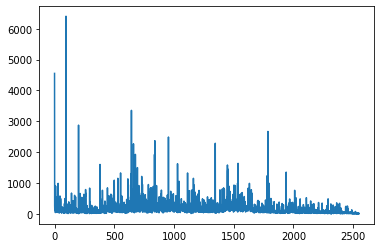

In [15]:
# This is an example of how to use Pandas to plot 
# If you place the cursor inside the parenthesis 
# you can can hold shift and press tab 4 times to open info window about the method
ted.comments.plot()

This is a line plot. The x-axis the index (up to 2550 rows) and y-axis is the value on the comments field at that index (up to 6404 comments).

We shouldn't use line plot here because line plots are for things measured over time.

**But** we can learn that many talks have a few comments and some talks have a lot of comments.

We want to creat a plot that shows how often particular values are occuring. This is called the `frequency distribution`. 

1. Pick plot type that show the distribution of comments
2. Modify the defaults to make it as informative as possible


<AxesSubplot:ylabel='Frequency'>

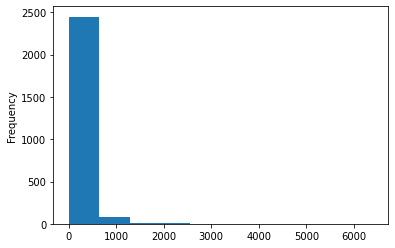

In [16]:
ted.comments.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

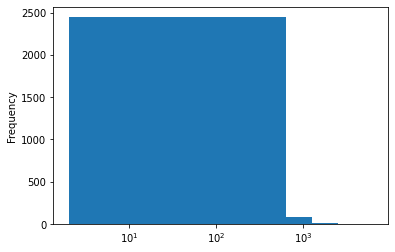

In [17]:
# This is tooo fat and the x values are not easily readable
ted.comments.plot(kind='hist', logx='sym')

<AxesSubplot:ylabel='Frequency'>

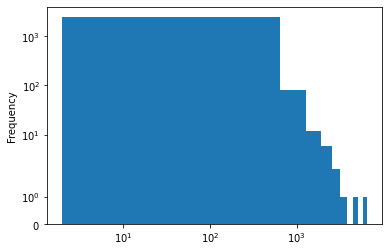

In [18]:
# We see that the y-values didn't change so if I want to keep the x-values readable I shouldn't use log on x
# Let's try loglog for fun
ted.comments.plot(kind='hist', loglog='sym')

<AxesSubplot:ylabel='Frequency'>

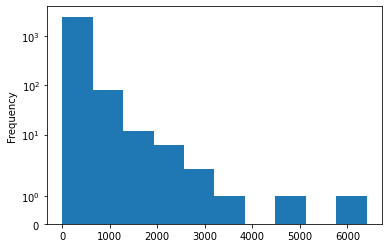

In [19]:
# That is a little better visually. We can see those lower frequency high values
# but with logx the x values because unreadble and with loglog both the x and y values have transformed
# if we try logy then we should be able to see the x-values as they are and get some type of log transformation
ted.comments.plot(kind='hist', logy='sym')

***This looks great!*** We can see a more nuanced separation of frequency of each range of values. It's not a fat block and the higher values that occur at lower frequency become nicely visible

The natural choice for a frequency distibution is `histogram`. It creates 10 equally sized bins by default.

Now to refine this a little more we see that there are a lot of comments in the first bin, which ranges from 0 to 600 comments approximately. So we see that most talks have 600 or less comments

<AxesSubplot:ylabel='Frequency'>

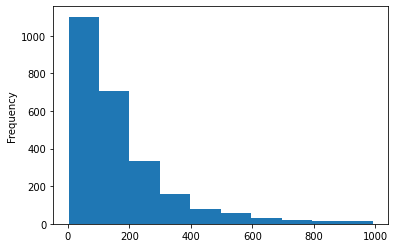

In [20]:
# Let's filter the original plot down
ted[ted.comments < 1000].comments.plot(kind='hist')

In [21]:
ted[ted.comments>=1000].shape

(32, 19)

In the plot we see a more visible ditribution but we have lost information of the higher value comments. However, by filtering the .shape for greater than or = to 1000, we see there are only 32 rows we lost.

<AxesSubplot:ylabel='Frequency'>

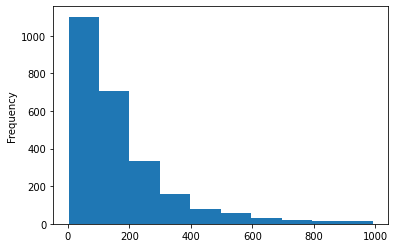

In [22]:
# alternative way to write the code for the same plot
# the query method requires passing a string
ted.query('comments < 1000').comments.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

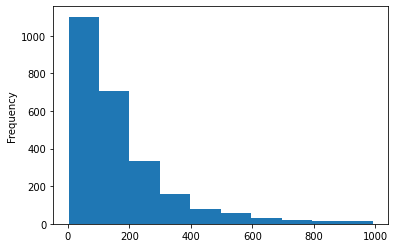

In [23]:
# another variation of code
# ***THIS CONSIDERED THE MOST READBLE WAY***
# it is the most explicit. it says which rows and columns we want.
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist')

With .loc you can pass a list of columns or range (columnA:columnB) or a bolean series

<AxesSubplot:ylabel='Frequency'>

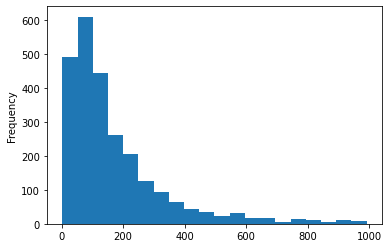

In [24]:
# We can increase the number of bins
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist', bins=20)

We can see the highest frequency number of comments is between 50 and 100.

<AxesSubplot:ylabel='Frequency'>

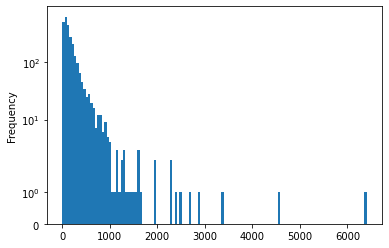

In [25]:
# Let's apply that to our log tranfsformation
ted.comments.plot(kind='hist', logy='sym',bins=130)

There is a better representation of those higher values but something strang is happening between 900 and 1600 comments. It seems that it is not percieving the differences there. Maybe because they are too similar.

<AxesSubplot:ylabel='Frequency'>

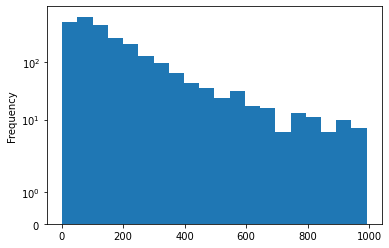

In [55]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist',logy='sym', bins=20)

We can see there might be too much distortion with the log transformation at this point. It was a good first step but the solution of filtering below 1000 and increasing the number of bins was more informative overall. I need to consider that the log transformation also reduces the exponential aspect of the visualization. We can't clearly see it.

<AxesSubplot:>

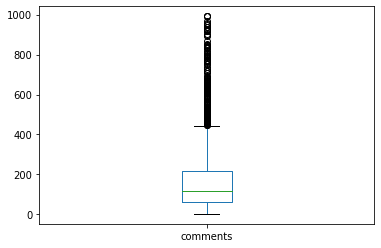

In [26]:
# Box plots are another good alternative
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box')

Problems here are that the dots are all outliers and there are too many of them here for this to be informative.

**Lesson takeway**
1. Choose your plot types based on the question you are answering and datatypes that you are working with. 
    - histograms are for frequency distributions
    - bar plots are good for comparing categories
    - line plots are for time series 
    - scatter plots are for comparing multiple columns of numeric variable
    
    
2. Use pandas one-liners to iterate through plots quickly
    - Pandas is calling matplotlib under the hood. But it is faster to write.
    - The downside is there is less modifcation options that using motplotlib for example
    
    
3. Try modifying the plot defaults
    - Remember that you can place the cursor in the paranthesis of the plot method. Hold shift and press tab 4 times to get a docstring
    

4. Creating plots involves decision-making
    - You may need to cut some things out of the visualization for it to became readble
    - There is no right way to visualize
    - BE CAREFUL! It is very easy to create a misleading visualization.....

# 4. Plot the number of talks that took place each year

First we expect a frequency distribution, so a histogram. Years on the x-axis and frequency of talks on the y-axis. But could it be a scatter plot. Both are numerical values.

In [27]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,8487.750000
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,20245.984823


In [30]:
ted.event.plot()

TypeError: no numeric data to plot

Okay so we have a problem that `event` is not a numeric value so it can't be plotted the same way.

In [31]:
ted.sort_values('published_date')

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,8487.750000
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,20245.984823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,0.000038,26495.882353
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,0.000014,69578.333333
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,0.000027,37564.700000
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'n

<AxesSubplot:ylabel='Frequency'>

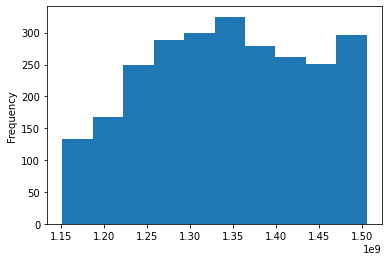

In [32]:
ted.published_date.plot(kind='hist')

In [33]:
ted.event.sample(10)

1125               TEDxEast
2270    TEDxColoradoSprings
1267                TED2012
2138            TEDMED 2015
1377          TED@Bangalore
700                 TED2010
1929         TEDGlobal 2014
2312             TEDxAthens
537          TEDGlobal 2009
1024         TEDGlobal 2011
Name: event, dtype: object

The event column is an object type which could be very irregular...it is a string...not numeric.

In the kaggle dataset filmdate is "The Unix timestamp of the filming"

In [34]:
ted.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [35]:
pd.to_datetime(ted.film_date)

0      1970-01-01 00:00:01.140825600
1      1970-01-01 00:00:01.140825600
2      1970-01-01 00:00:01.140739200
3      1970-01-01 00:00:01.140912000
4      1970-01-01 00:00:01.140566400
                    ...             
2545   1970-01-01 00:00:01.496707200
2546   1970-01-01 00:00:01.492992000
2547   1970-01-01 00:00:01.492992000
2548   1970-01-01 00:00:01.499472000
2549   1970-01-01 00:00:01.492992000
Name: film_date, Length: 2550, dtype: datetime64[ns]

`pd.to_date(x)` usually give good results at guessing the format and giving a good estimate. But we see the result is not good at all. If you did this but didn't search pandas to_datetime then..... BAD PROGRAMMER!!!

We find a solution on the page that says unit='s'

The to_dattime method is a top level method/function. It's not a series or dataframe method

In [36]:
pd.to_datetime(ted.film_date, unit='s')

0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [37]:
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')

In [38]:
# Now we want to see confirmation that our results are reliable.
# So we can randomly sample a comparison between event and film_datetime
ted[['event', 'film_datetime']].sample(5)

,event,film_datetime
152,TED2007,2007-03-03
680,TED2010,2010-02-10
935,TEDxCaltech,2011-01-14
974,TED2011,2011-03-03
260,TED1998,1998-02-02


You can run that a few times and see if there are any inconsistencies

In [39]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

The new column is using the datetime data type. That gives us a lot of options with `.dt.` namespace

In [40]:
ted.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

In [41]:
ted.film_datetime.dt.dayofweek.head()

0    5
1    5
2    4
3    6
4    2
Name: film_datetime, dtype: int64

In [42]:
ted.film_datetime.dt.dayofyear.head()

0    56
1    56
2    55
3    57
4    53
Name: film_datetime, dtype: int64

In [43]:
ted.film_datetime.dt.day.head()

0    25
1    25
2    24
3    26
4    22
Name: film_datetime, dtype: int64

This is similar to string methods like str.lower()

In [44]:
ted.event.str.lower()

0            ted2006
1            ted2006
2            ted2006
3            ted2006
4            ted2006
            ...     
2545         ted2017
2546         ted2017
2547         ted2017
2548    tedxmilehigh
2549         ted2017
Name: event, Length: 2550, dtype: object

<AxesSubplot:ylabel='Frequency'>

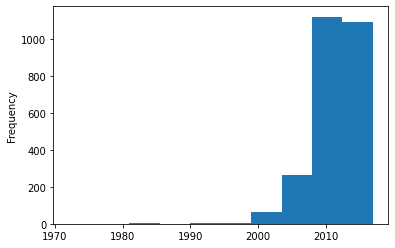

In [45]:
ted.film_datetime.dt.year.plot(kind='hist')

We could also use value_counts method.

In [46]:
ted.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1984      1
1983      1
1991      1
1994      1
1990      1
1972      1
Name: film_datetime, dtype: int64

<AxesSubplot:ylabel='Frequency'>

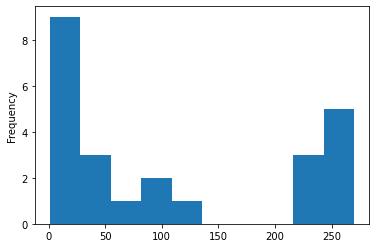

In [47]:
ted.film_datetime.dt.year.value_counts().plot(kind='hist')

<AxesSubplot:>

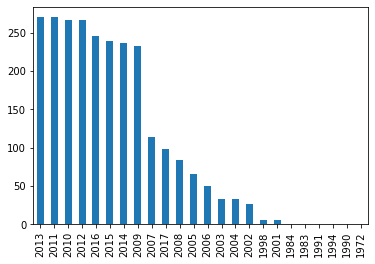

In [48]:
ted.film_datetime.dt.year.value_counts().plot(kind='bar')

They are excpluding years that don't have talks. SO it is a little misleading because you can't see the jumps.

We might be able to see it better as a line plot since it is for things that are plotted over time.

<AxesSubplot:>

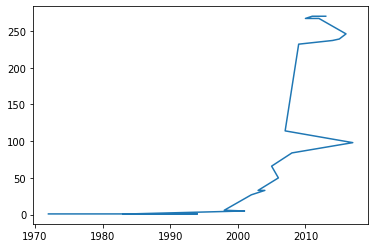

In [49]:
ted.film_datetime.dt.year.value_counts().plot()

What went wrong? 
- There is a sorting issue.

In [50]:
ted.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1984      1
1983      1
1991      1
1994      1
1990      1
1972      1
Name: film_datetime, dtype: int64

Pandas is plotting these values in the order they are listed and connecting them in that order.

In [52]:
ted.film_datetime.dt.year.value_counts().sort_index(ascending=True)

1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: film_datetime, dtype: int64

<AxesSubplot:>

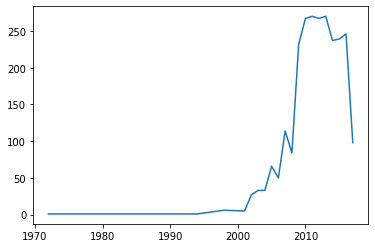

In [54]:
ted['film_datetime'].dt.year.value_counts().sort_index(ascending=True).plot()

Before we make a conclusion about sharp decline after 2015 we need to look at where the information ends.

In [55]:
ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

In [57]:
ted.film_datetime.min()

Timestamp('1972-05-14 00:00:00')

We see there is incomplete information about 2017 because it ended in August and there could be a large number of talks given at the end of the year that were not counted.

**Lessons**
1. Read the documentation
2. Use datetime dtype for dates and times
    - it works well with plots  
    - it provides convenient attributes
3. Check your work as you go 
    - we used random sample to get various examples of values to check that our information was generally correct
4. Consider excluding data if it might not be relevant.
    - We might exclude 2017 if there is not enouugh information to be helpful about that year.
    - Are all the talks in the dataset TED talks? Do some research. TED talks began in 1984. We have data starting with 1972....

[***Click to continue to
part 2***](2_pandas_challenges_5-7.ipynb)

In [59]:
%store ted

Stored 'ted' (DataFrame)
